In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import dendrogram

# Datensätze

In [7]:
def bubbleSetNormal(mx,my,number,s):
    x = np.random.normal(mx, s, number) 
    y = np.random.normal(my, s, number)
    return(x,y)

def fourBalls(equal_sizes=True):
    # np.random.seed(42) 
    (n1,n2,n3,n4) = (400, 400, 400, 400) if equal_sizes else (100, 100, 400, 400)
    dataset = np.zeros( (n1+n2+n3+n4,2) )    
    (dataset[0:n1,0],                 dataset[0:n1,1])                 = bubbleSetNormal( 2.5,  1.0, n1, 0.5)     
    (dataset[n1:n1+n2,0],             dataset[n1:n1+n2,1])             = bubbleSetNormal( 2.0, -3.0, n2, 0.3)    
    (dataset[n1+n2:n1+n2+n3,0],       dataset[n1+n2:n1+n2+n3,1])       = bubbleSetNormal(-2.0,  5.0, n3, 0.6)   
    (dataset[n1+n2+n3:n1+n2+n3+n4,0], dataset[n1+n2+n3:n1+n2+n3+n4,1]) = bubbleSetNormal(-4.0, -1.0, n4, 0.9)        
    return (dataset)  

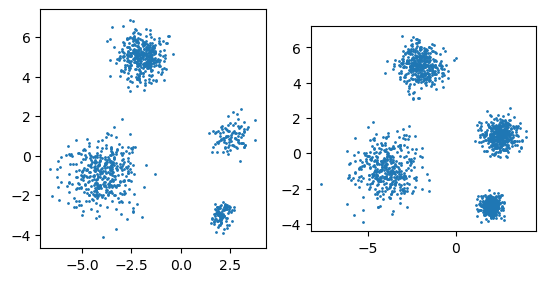

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
balls_F = fourBalls(False)
ax1.scatter(balls_F[:,0], balls_F[:,1], s=1)
ax1.set_aspect(1)
ax2 = fig.add_subplot(1,2,2)
balls_T = fourBalls(True)
ax2.scatter(balls_T[:,0], balls_T[:,1], s=1)
ax2.set_aspect(1)

In [12]:
len(balls_T), len(balls_F)

(1600, 1000)

In [21]:
def mouseShape():
    # np.random.seed(42)        
    dataset = np.zeros( (1000,2) )    
    (dataset[0:150,0],dataset[0:150,1])     = bubbleSetNormal(-0.75, 0.75,150,0.15)     
    (dataset[150:300,0],dataset[150:300,1]) = bubbleSetNormal( 0.75, 0.75,150,0.15)    
    (dataset[300:1000,0],dataset[300:1000,1]) = bubbleSetNormal( 0, 0,700,0.29)   
    return dataset

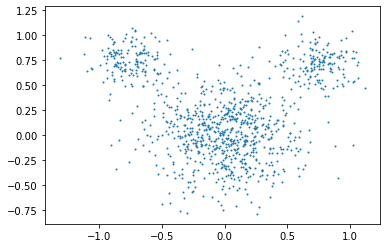

In [4]:
plt.scatter(*tuple(mouseShape().T), s=1)

In [15]:
X = tuple(datasets.make_moons(noise=0.05)[0].T)

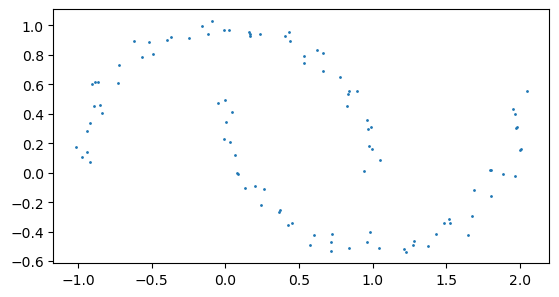

In [16]:
plt.scatter(*X, s=1)
plt.gca().set_aspect(1)

In [17]:
def circles(n=800):
    np.random.seed(42) 
    phi = np.random.rand(n) * np.pi * 2
    x1 = 1.5*np.cos(phi)
    y1 = 1.5*np.sin(phi) 
    phi = np.random.rand(n) * np.pi * 2
    x2 = 0.5*np.cos(phi)
    y2 = 0.5*np.sin(phi)
    X = np.vstack((np.append(x1,x2), np.append(y1,y2))).T
    X = X + 0.1*np.random.normal(size=X.shape)
    return(X)

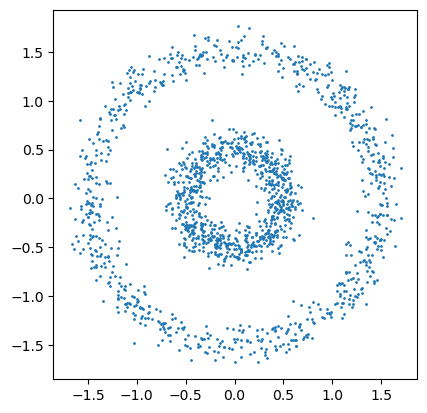

In [18]:
plt.scatter(*circles().T, s=1)
plt.gca().set_aspect(1)

# k-Means
## Konstruktor
`KMeans(n_clusters, [init, n_init, max_iter, tol, verbose, random_state, copy_x])`
* `n_clusters : int, default=8`  
   Anzahl Clusters
* `init : {'k-means++', 'random'}, default = 'k-means++'`  
    Initialisierungsmethode
* `n_init : int, default=10`  
   Anzahl Durchläufe mit unterschiedlichen Initialisierungen
*  `max_iter : default=300`   
    Maximale Anzahl Durchläufe
* `tol : float, default=1e-4`  
   Toleranz: Wenn Zielwert sich nicht mehr verbessert als `tol` wird abgebrochen
* `verbose : int, default=0` 
* `random_state : int, default=None`
* `copy_x : bool, default=True`  
   Aus Effizienzgründen wird Datensatz zentriert.  
   Wenn `copy_x=True` wird Datensatz Kopie erstellt und die Kopie zentriert. Sonst wird Datensatz selber zentriert.
   
## Methoden
`fit(self, X, [y=None, sample_weight])`  
   Berechnet die Zentren des Clustering  
*  Parameter:  
    * `X` Feature-Matrix
    * `y` Wird ignoriert (Konsistenz mit API)
    * `sample_weight : default=None` Gewichtsvektor für die Samples
* `return self`

`predict(self, X)`  
Ordnet jedem Sample den Indes eines Clusters zu.
* Parameter:
   * `x` wie bei `fit`
* `return` Array mit Clusterindices

`fit_predict(self, X, [y, sample_weight])` 
Äquivalent zu `fit(X)` gefolgt von `predict(X)` 

`transform(self, X, sample_weight)`  
Bestimmt Abstände der Samples zu den zugehörigen Clusterzentren.
*  Parameter
    * `X` Feature-Matrix für Samples
    * `sample_weight : default=None` Gewichtsvektor für die Samples
* `return` Abstandsvektor

`fit_transform` 
Äquivalent zu `fit`, gefolgt von `transform`

`score(self, X, sample_weight)`  
Negatives der Summe der Abstandsquadrade zu dem Clusterzentren
*  Parameter
    * `X` Feature-Matrix für Samples
    * `sample_weight : default=None` Gewichtsvektor für die Samples
* `return` Summe der Abstände


## Attribute
* `labels_ : ndarray of shape (n_clusters, n_features)`  
   Clusterindices für alle Samples
* `inertia_ : float` 
   Summe der Abstandsquadrate der Samples von ihren Cluster-Zentren

In [22]:
mouse = mouseShape()

In [23]:
km_3 = KMeans(3)

In [24]:
pred = km_3.fit_predict(mouse)

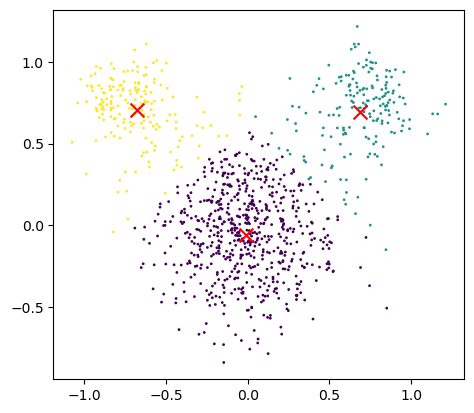

In [26]:
plt.scatter(mouse[:,0], mouse[:,1], c=pred, s=1)
plt.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:,1], c='r', marker='x', s=100)
plt.gca().set_aspect(1)

In [27]:
km_3.inertia_

113.27390519400515

In [28]:
km_3.score(mouse)

-113.27390519400515

In [29]:
all(km_3.predict(mouse) == km_3.labels_)

True

In [30]:
km_3.cluster_centers_

array([[-0.01292822, -0.05922775],
       [ 0.68687915,  0.69209759],
       [-0.67994362,  0.70360771]])

In [112]:
li = []
for i in range(2,11):
    km = cluster.KMeans(i).fit(mouse)
    li.append(km.inertia_)
    print(i, km.inertia_)

2 248.33741300135236
3 115.78244543009849
4 84.9600090657901
5 63.66242098577696
6 53.14241851578821
7 47.12050814014843
8 41.77027668911222
9 38.80601493886806
10 34.862596687157684


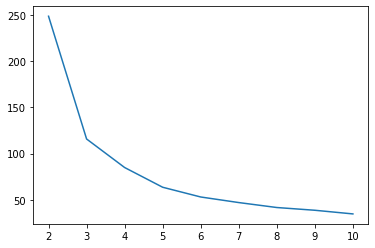

In [113]:
plt.plot(range(2, 11), li)

## Aufgabe
Wende K-Means auf die oben definierten Datensätze an.

# Hierarchisches Clustering: AgglomerativeClustering
## Konstruktor

`AgglomerativeClustering(n_clusters=2, [ affinity, linkage, distance_threshold, compute_distances])`

* `n_clusters : int or None, default=2`  
   Anzahl Clusters. Wenn `distance_threshold` gesetzt wird, muss es None sei.   
* `affinity : 'euklidian', 'l1', l2', 'manhattan' or 'cosine', default='euklidian'`  
   Metrik für Abstände
* `linkage : 'ward', 'complete', 'average', 'single' or 'ward', default='ward'`  
   Art der Abstandsberechnung von Clustern
* `compute_distances : bool, default=False`
   Berechnet Distanzen der Knoten, auch wenn sie für Algo nicht benötigt werden (z.B. für Dendrogramm)
   
## Methoden
`fit(self, X, [y])`  
   Führt Clustering durch  
*  Parameter:  
    * `X` Feature-Matrix
    * `y` Wird ignoriert (Konsistenz mit API)
* `return self`

`fit_predict(self, X)`  
Ordnet jedem Sample den Indes eines Clusters zu.
*  Parameter:  
    * `X` Feature-Matrix
* `return` Array mit Clusterindices

## Attribute
* `labels_ : ndarray of shape (n_samples)`   
   Cluster-Indices
*  `children_array-like of shape (n_samples-1, 2)` 
   Beschreibung des Baumes:
   * An der i-ten Stelle steht ein Paar mit den Kindern des i-ten Knotens
   * Falls eine solche Nummer `x < n_features` ist, dann ist das die Nummer eines Blattes
   * Anderenfalls ist x ein interner Knoten, dessen Nachfolger durch `children_[x - n_features]` beschrieben sind.
* `distances : Array`  
   Enthält die Abstände der Cluster


### Dendrogramme
Dendrogramme können mit scipy erstellt werden.

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [35]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")

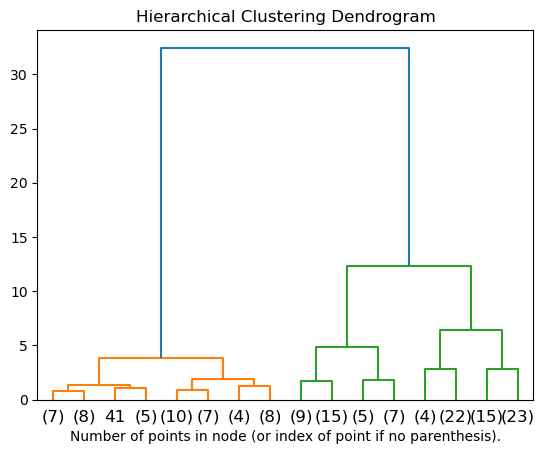

In [36]:
iris = datasets.load_iris()
X = iris.data
# setting distance_threshold=0 ensures we compute the full tree.
iris_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
iris_model.fit_predict(X)
plot_dendrogram(iris_model, truncate_mode="level", p=3)

## Aufgabe
Wende hierarchisches Clustering auf die oben definierten Datensätze an und erstelle Dendrogramme.

# DBSCAN
## Konstruktor
DBSCAN(eps, *, min_samples)
* `eps : float, default=0.5` 
   Radius der Umgebungen
* `min_samples : int, default=5`  
   Minimale Anzahl Punkte in Umgebung eines Kernpunktes (inkusiv Kernpunkt selber)
   
## Methoden
`fit(self, X, [y, sample_weight])`  
   Führt Clustering durch  
*  Parameter:  
    * `X` Feature-Matrix
    * `y` Wird ignoriert (Konsistenz mit API)
    * `sample_weight : default=None` Gewichtsvektor für die Samples
* `return self`

`fit_predict(self, X, [y, sample_weight])`  
Führt Clustering durch und liefert Array mit Indices der Clusters für jedes Sample.
*  Parameter:  
    * `X` Feature-Matrix
    * `y` Wird ignoriert (Konsistenz mit API)
    * `sample_weight : default=None` Gewichtsvektor für die Samples
* `return` Array mit Clusterindices

## Attribute
* `core_sample_indices_ : ndarray of shape (n_core_samples,)` 
    Indices of core samples.
* `components_ : ndarray of shape (n_core_samples, n_features)` 
    Copy of each core sample found by training.
*  `labels_ : ndarray of shape (n_samples)`  
    Cluster labels for each point in the dataset given to fit().  
    Noisy samples are given the label -1.

In [211]:
dbscan = DBSCAN(0.1, min_samples=6)
dbscan.fit(mouse)
print(max(dbscan.labels_))

4


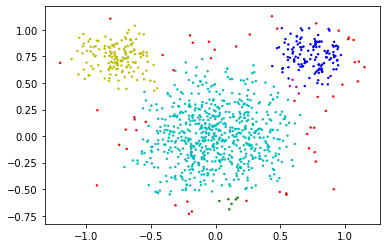

In [214]:
plt.scatter(mouse[:,0], mouse[:,1], s=2, c=['rycbmgk'[min(6, cl + 1)] for cl in dbscan.labels_])

## Aufgabe
Wende DBSCAN auf die oben definierten Datensätze an.

## Silhouetten
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

In [44]:
iris = datasets.load_iris()
X = iris.data
iris_model = AgglomerativeClustering(n_clusters=3)
iris_model.fit_predict(X)
iris_model.labels_

silhouette_samples(iris.data, iris_model.labels_)

array([ 0.85413673,  0.81707604,  0.83071704,  0.80670235,  0.85049842,
        0.75029326,  0.82313466,  0.85512951,  0.75425613,  0.82678623,
        0.80462757,  0.83732256,  0.81215814,  0.7481182 ,  0.70452031,
        0.64606827,  0.77733417,  0.85223589,  0.70911597,  0.82172311,
        0.78603135,  0.82733362,  0.79449061,  0.79604917,  0.77710382,
        0.80046733,  0.83494787,  0.8433089 ,  0.84491227,  0.81944997,
        0.81683786,  0.80069257,  0.76441119,  0.72411046,  0.83026278,
        0.83359078,  0.79571512,  0.84312705,  0.77047928,  0.85158197,
        0.85062307,  0.64208404,  0.7883121 ,  0.80203765,  0.74920523,
        0.81143353,  0.8148841 ,  0.82053755,  0.81965402,  0.85332569,
        0.06008778,  0.39350404, -0.05092527,  0.58962147,  0.38514862,
        0.5927984 ,  0.29756562,  0.25168431,  0.36364083,  0.57390335,
        0.36388143,  0.58567351,  0.55155199,  0.49201073,  0.55254868,
        0.34086542,  0.55740581,  0.60916427,  0.46826791,  0.60

## Aufgabe
1) Vergleiche die untersuchten Clusterings mit dem Silhouettekoeffizienten
2) Erstelle Silhouettenplots
3) Der Iris-Datensatz und der Digits-Datensatz aus SKLearn sind gelabeled. 
   Wende die Clusteringverfahren auf diese Datensätze an und vergleiche die 
   Clusterstruktur mit den Labels.